In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from pycountry import countries

In [114]:
survey = pd.read_csv('survey_results.csv')
survey.head()

ResponseId                      MainBranch              Age  \
0           1                   None of these  18-24 years old   
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  LearnCodeCoursesCert  \
0                                                NaN                   NaN   
1  Formal documentation provided by the owner of ...                 Other   
2  Formal documentation provided by the owner of ...                   NaN   
3  Formal documentation provided by the owner of ...                   NaN   
4  Formal documentation provided by the owner of ...  Other;Codecademy;edX   

   ... AISearchWantToWorkWith                      SOVisitFreq SOAccount  \
0  ...                    NaN                              NaN       NaN   
1  ...       ChatGPT;Neeva AI            Daily or almost daily       Yes   
2  ...                    NaN  A few times per month or weekly       Yes   
3  ...                    NaN             A few times per week       Yes   
4  ...                ChatGPT             A few times per week        No   

                            SOPartFreq        Frequency_1        Frequency_2  \
0                                  NaN                NaN                NaN   
1      A few times per month or weekly   1-2 times a week   10+ times a week   
2  Less than once per month or monthly  6-10 times a week  6-10 times a week   
3  Less than once per month or monthly   1-2 times a week   10+ times a week   
4                                  NaN   1-2 times a week   1-2 times a week   

        Frequency_3         TimeSearching        TimeAnswering  \
0               NaN                   NaN                  NaN   
1             Never   15-30 minutes a day  15-30 minutes a day   
2  3-5 times a week   30-60 minutes a day  30-60 minutes a day   
3  1-2 times a week   15-30 minutes a day  30-60 minutes a day   
4  3-5 times a week  60-120 minutes a day  30-60 minutes a day   

                                            Industry  
0                                                NaN  
1  Information Services, IT, Software Development...  
2  Information Services, IT, Software Development...  
3    

In [115]:
survey.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Country', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
       'TimeAnswering', 'Industry'],
      dtype='object')

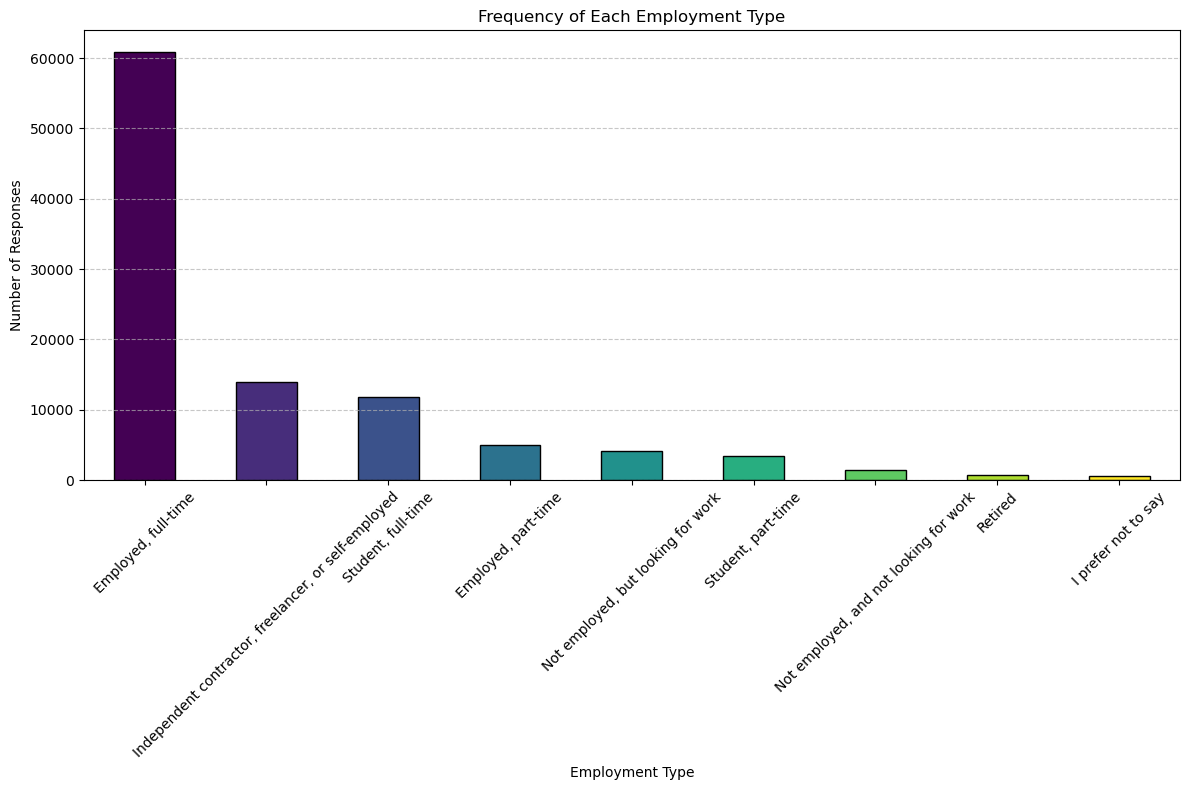

In [116]:
# Assuming that multiple employment types are separated by semicolons in the 'Employment' column
# First, drop any NaN values to avoid errors during splitting
survey['Employment'] = survey['Employment'].dropna()

# Split the 'Employment' entries and explode them into a new DataFrame row for each type
employment_types = survey['Employment'].str.split(';').explode()

# Count the frequency of each employment type
employment_counts = employment_types.value_counts()

# Generate a color map from matplotlib's available palettes
colors = plt.cm.viridis(np.linspace(0, 1, len(employment_counts)))

# Plotting the employment type frequencies as a bar chart
plt.figure(figsize=(12, 8))
employment_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Frequency of Each Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


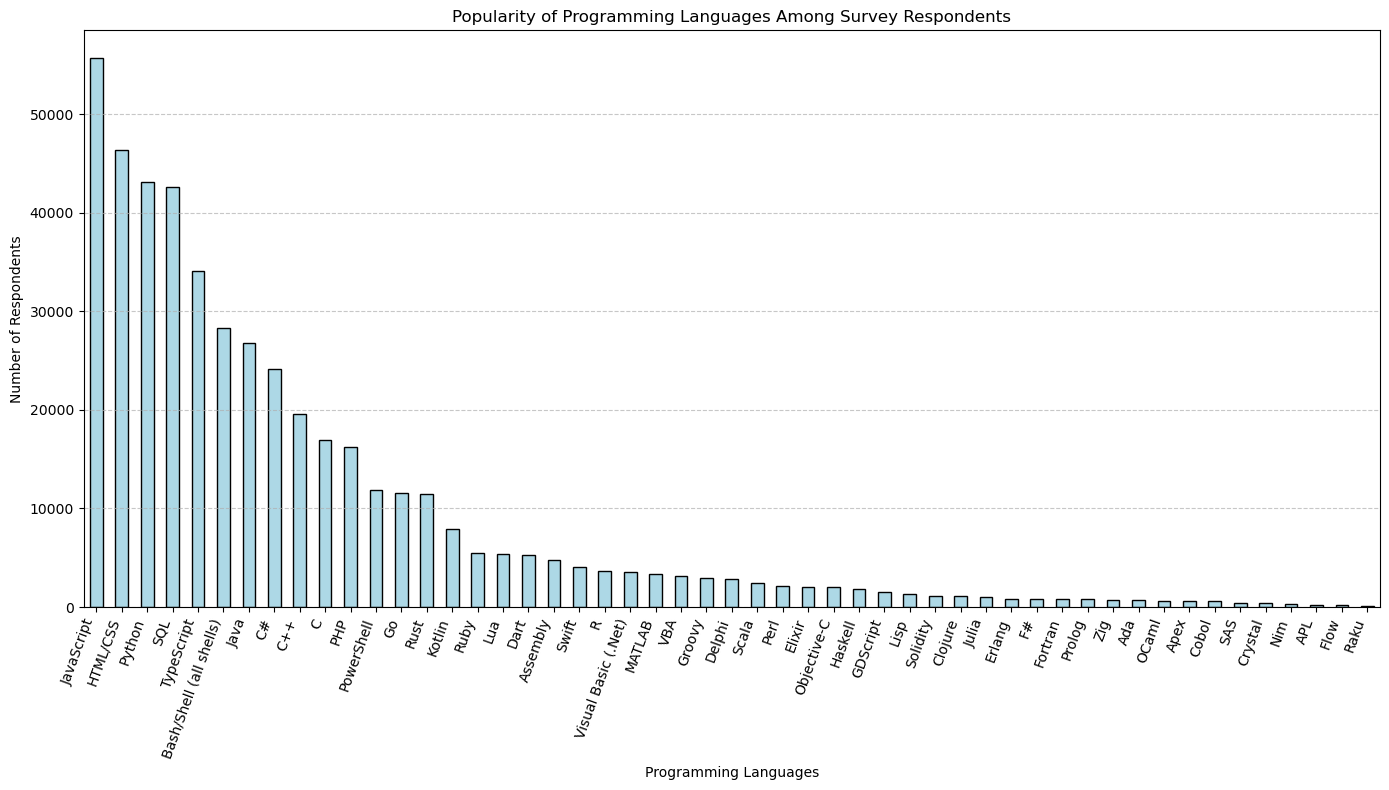

In [117]:
# Splitting the 'LanguageHaveWorkedWith' column into individual languages
# Assuming languages are separated by semicolons
language_series = survey['LanguageHaveWorkedWith'].dropna().str.split(';')
all_languages = language_series.explode()

# Counting occurrences of each language
language_counts = all_languages.value_counts()

# Plotting the language popularity
plt.figure(figsize=(14, 8))
language_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Popularity of Programming Languages Among Survey Respondents')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout
plt.show()


I printed out unique values in the 'Age' column to understand the data format before plotting.

In [118]:
print(survey['Age'].unique())

['18-24 years old' '25-34 years old' '45-54 years old' '35-44 years old'
 'Under 18 years old' '55-64 years old' '65 years or older'
 'Prefer not to say']


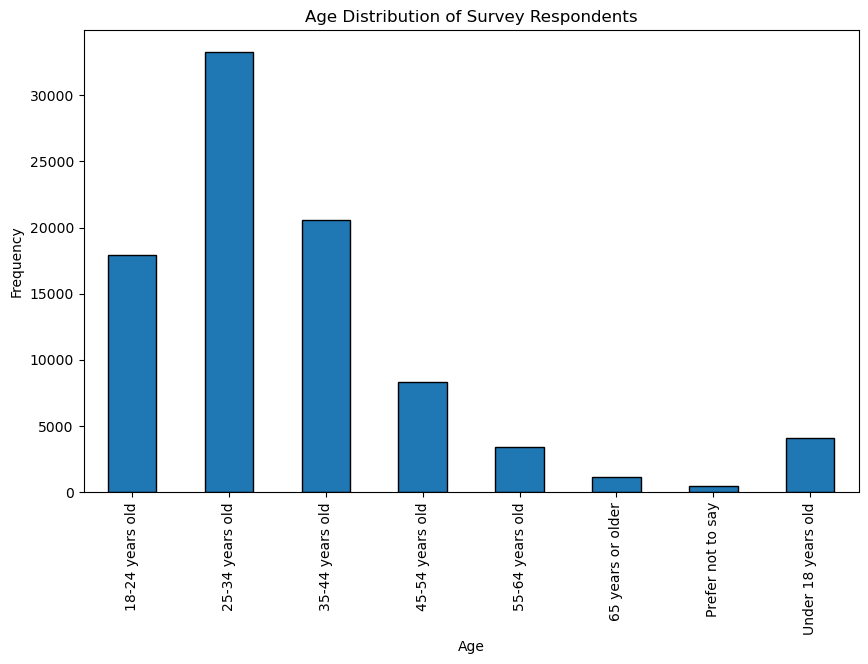

In [119]:
plt.figure(figsize=(10, 6))
survey['Age'].value_counts().sort_index().plot(kind='bar', edgecolor='black') 
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


Using Histograms to show the frequency distribution of years of coding and years of professional coding.
Looking at the data the range between the years of coding is 1 and 50 
To account for the data less than 1 and more than 50:
 Convert 'YearsCode' and 'YearsCodePro' to numeric, handling non-numeric entries
 Assuming 'Less than 1 year' as 0.5 and 'More than 50 years' as 51

I just learnt about the  plt.tight_layout]) function in matplotlibthat  is used to automatically adjust subplot parameters to give specified padding and avoid plot elements overlapping each other, which can make the plot clearer and more visually appealing. 

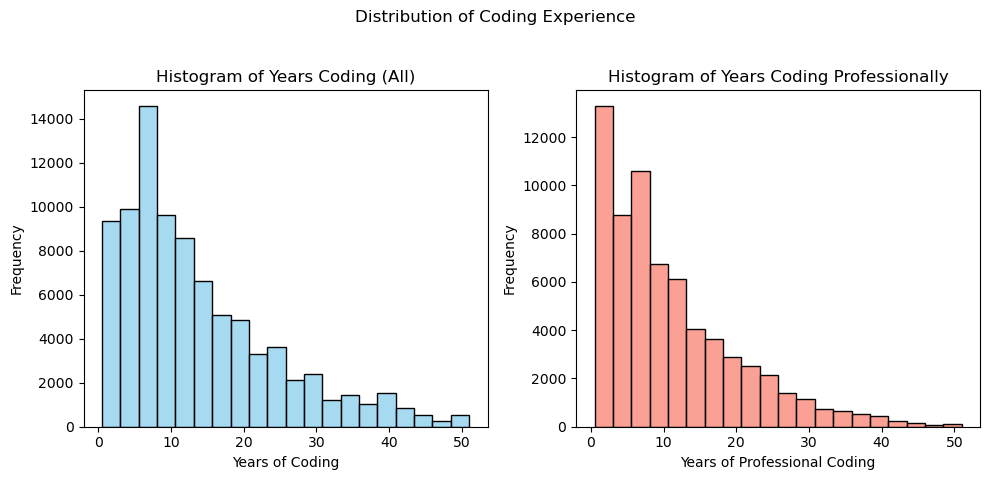

In [120]:
survey['YearsCode'] = pd.to_numeric(survey['YearsCode'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}), errors='coerce')
survey['YearsCodePro'] = pd.to_numeric(survey['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}), errors='coerce')

# Plotting histograms
fig2, ax = plt.subplots(1, 2, figsize=(10, 5))  # Set up a figure with three subplots in one column
fig2.suptitle('Distribution of Coding Experience')

# Histogram for YearsCode
sns.histplot(survey['YearsCode'], bins=20, kde=False, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Years Coding (All)')
ax[0].set_xlabel('Years of Coding')
ax[0].set_ylabel('Frequency')

# Histogram for YearsCodePro
sns.histplot(survey['YearsCodePro'], bins=20, kde=False, ax=ax[1], color='salmon')
ax[1].set_title('Histogram of Years Coding Professionally')
ax[1].set_xlabel('Years of Professional Coding')
ax[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


In the box plot, the y-axis represents different developer types, and the x-axis represents the total compensation. 
Each 'box' represents the distribution of compensation for a particular developer type, showing the median, quartiles, and potential outliers (if any are within the filtered range). A unique color is assigned to each developer type using a hue-based color palettl. This provides a visually distinct color for each category, making it easier to differentiate them in the plot.

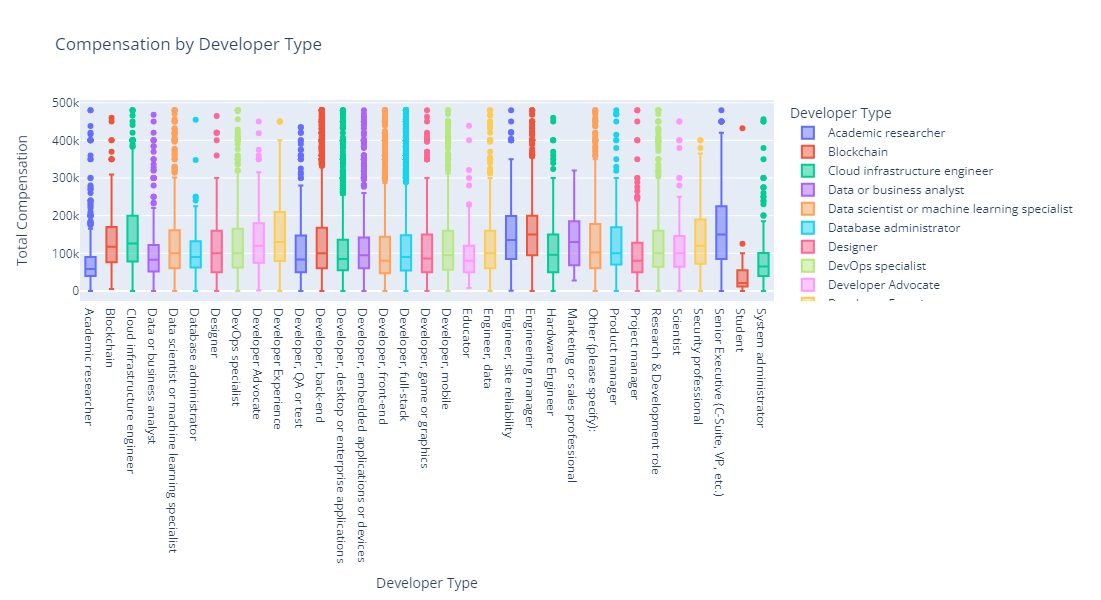

In [121]:
#using plotly
# Filter out relevant columns and drop rows with missing values in these columns
filtered_data = survey[['DevType', 'CompTotal']].dropna()

# The 'DevType' column contains multiple categories separated by semicolons, we need to split these and explode the DataFrame
filtered_data['DevType'] = filtered_data['DevType'].str.split(';').explode()

# Remove outliers in compensation for better visualization
q1 = filtered_data['CompTotal'].quantile(0.25)
q3 = filtered_data['CompTotal'].quantile(0.75)
iqr = q3 - q1
filtered_data = filtered_data[(filtered_data['CompTotal'] >= q1 - 1.5 * iqr) & (filtered_data['CompTotal'] <= q3 + 1.5 * iqr)]

# Create box plot with Plotly Express
fig = px.box(filtered_data, 
             y='CompTotal', 
             x='DevType',
             height=600,
             color='DevType',
             title='Compensation by Developer Type',
             labels={'CompTotal': 'Total Compensation', 'DevType': 'Developer Type'},
             category_orders={"DevType": sorted(filtered_data['DevType'].unique())}  # Optional: sort or specify order
            )

fig.show()


Pie charts are not the best way to represent data but I felt it was the best to visualize the work preference

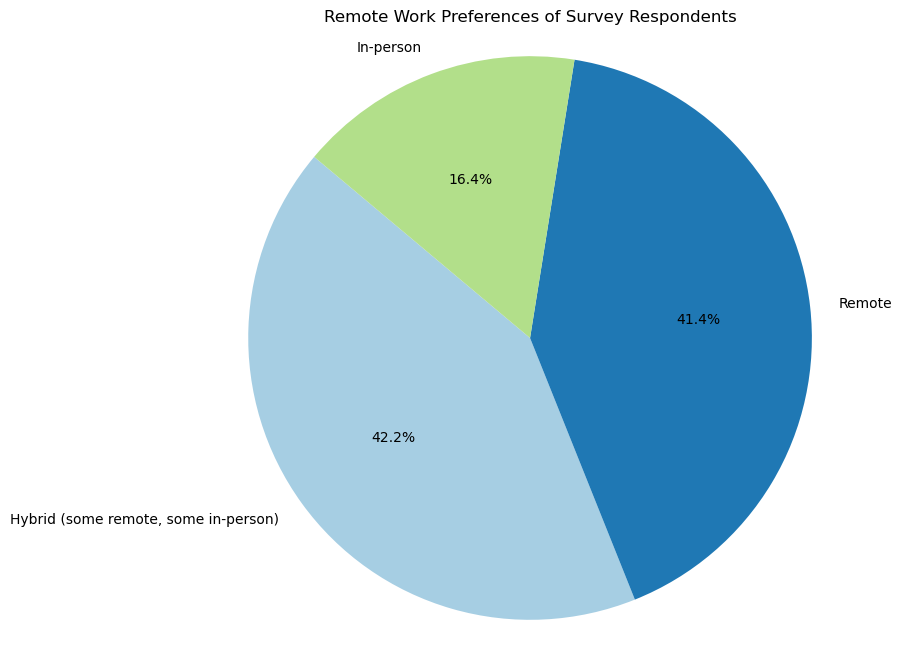

In [122]:
# Count the frequencies of each remote work status
remote_work_counts = survey['RemoteWork'].value_counts()

# Setting up the plot with subplots for flexibility
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(remote_work_counts, 
       labels=remote_work_counts.index, 
       autopct='%1.1f%%', # displays the percentage labels on the chat
       startangle=140, 
       colors=plt.cm.Paired(range(len(remote_work_counts))))
ax.set_title('Remote Work Preferences of Survey Respondents')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


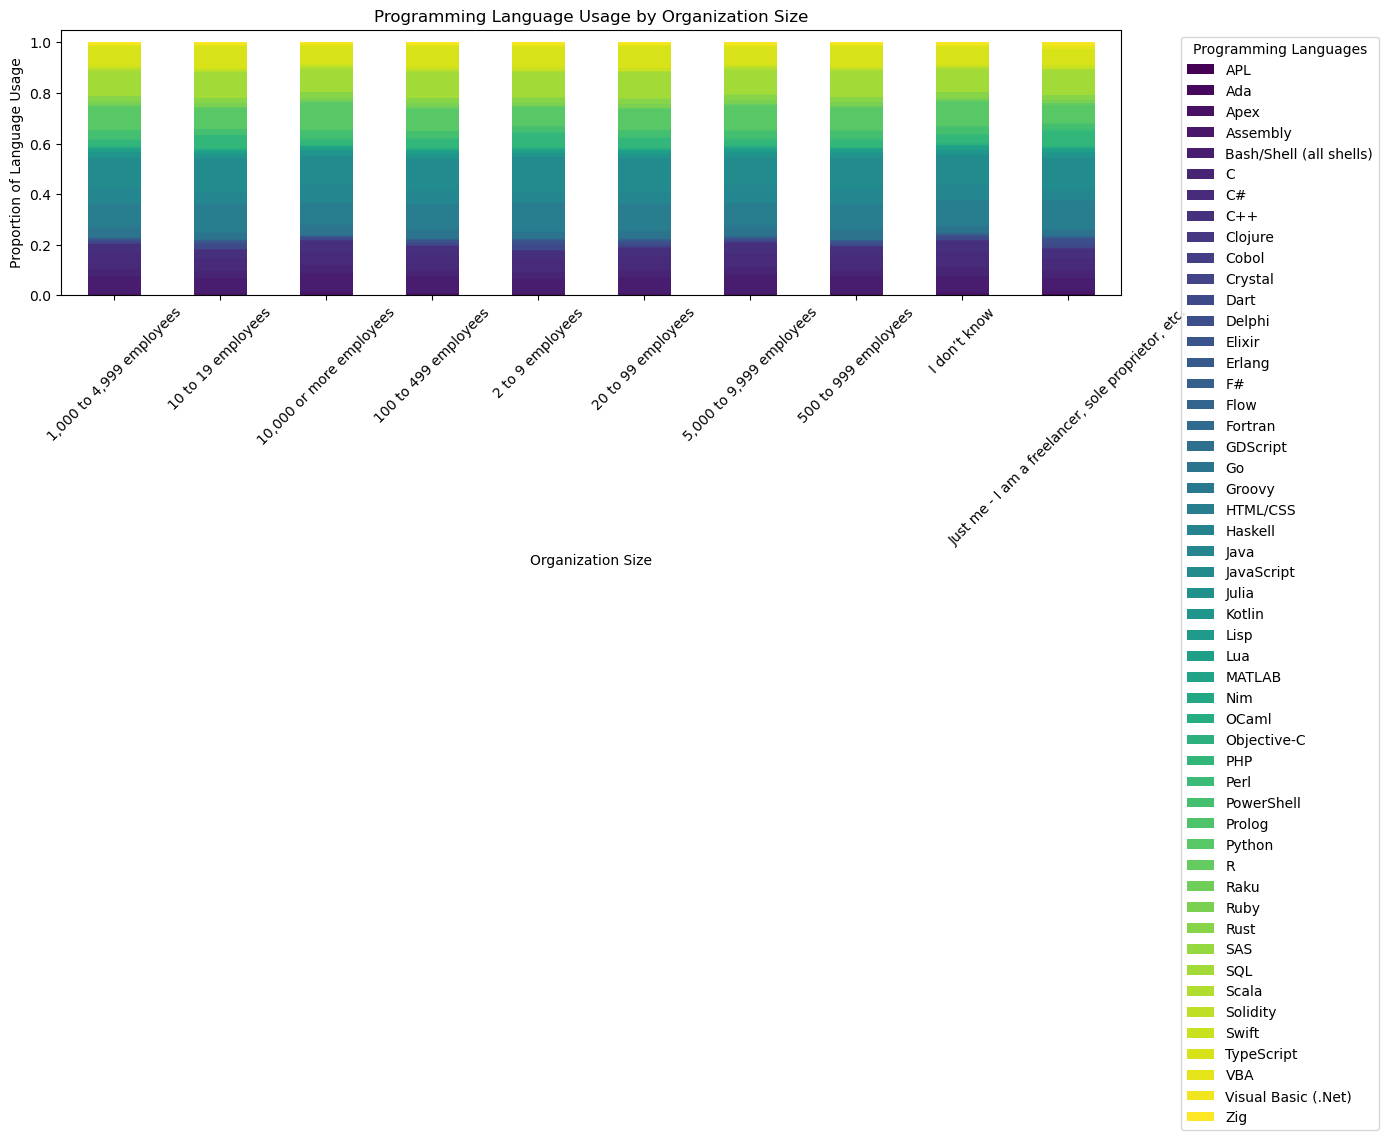

In [123]:
# Drop rows where either OrgSize or LanguageHaveWorkedWith is missing
survey.dropna(subset=['OrgSize', 'LanguageHaveWorkedWith'], inplace=True)

# Explode the 'LanguageHaveWorkedWith' based on ';' to separate multiple languages into individual rows
survey['Languages'] = survey['LanguageHaveWorkedWith'].str.split(';')
survey_exploded = survey.explode('Languages')

# Create a crosstab to count how many times each language is used within each organization size
language_by_orgsize = pd.crosstab(survey_exploded['OrgSize'], survey_exploded['Languages'])

# Normalize the data by rows to see the proportion of each language within an organization size
language_by_orgsize_normalized = language_by_orgsize.div(language_by_orgsize.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
language_by_orgsize_normalized.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Programming Language Usage by Organization Size')
ax.set_xlabel('Organization Size')
ax.set_ylabel('Proportion of Language Usage')
ax.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Filtering data based on the first 10 popular languages

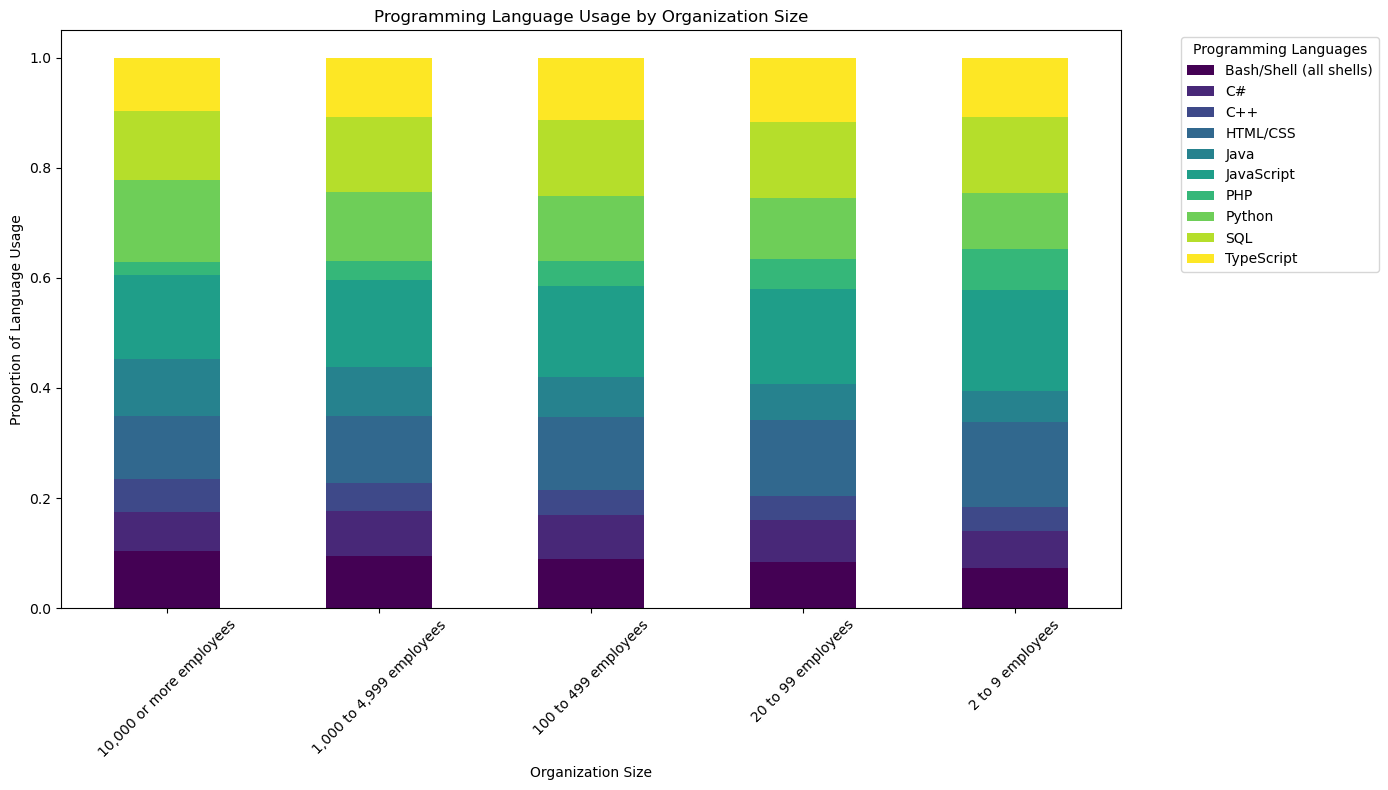

In [124]:
# Drop rows where either OrgSize or LanguageHaveWorkedWith is missing
survey.dropna(subset=['OrgSize', 'LanguageHaveWorkedWith'], inplace=True)

# Explode the 'LanguageHaveWorkedWith' based on ';' to separate multiple languages into individual rows
survey['Languages'] = survey['LanguageHaveWorkedWith'].str.split(';')
survey_exploded = survey.explode('Languages')

# Determine the 10 most common languages
top_languages = survey_exploded['Languages'].value_counts().nlargest(10).index

# Filter the data to only include the top 10 languages
survey_filtered = survey_exploded[survey_exploded['Languages'].isin(top_languages)]

# Filter the data to only include these organization sizes
survey_filtered = survey_filtered[survey_filtered['OrgSize'].isin(organization_sizes)]

# Create a crosstab to count how many times each language is used within each organization size
language_by_orgsize = pd.crosstab(survey_filtered['OrgSize'], survey_filtered['Languages'])

# Reindex the DataFrame according to the defined order of organization sizes
language_by_orgsize = language_by_orgsize.reindex(organization_sizes)

# Normalize the data by rows to see the proportion of each language within an organization size
language_by_orgsize_normalized = language_by_orgsize.div(language_by_orgsize.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
language_by_orgsize_normalized.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Programming Language Usage by Organization Size')
ax.set_xlabel('Organization Size')
ax.set_ylabel('Proportion of Language Usage')
ax.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I just learnt about the choropleth and I think its cool so I decided why not
I got this portion of code from chat GPT

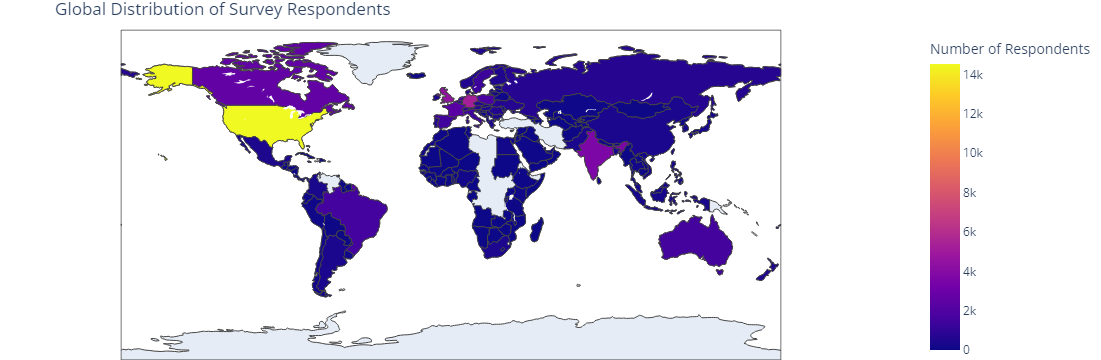

In [125]:
# Function to convert country names to ISO Alpha-3 codes
def get_alpha_3(country_name):
    try:
        return countries.lookup(country_name).alpha_3
    except:
        return None

# Apply the function to your country data
survey['iso_alpha'] = survey['Country'].apply(get_alpha_3)

# Count the number of respondents by country code
country_counts = survey['iso_alpha'].value_counts().reset_index()
country_counts.columns = ['iso_alpha', 'count']

# Create the choropleth map
fig = px.choropleth(country_counts,
                    locations="iso_alpha",
                    color="count",
                    hover_name="iso_alpha",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'count':'Number of Respondents'},
                    title="Global Distribution of Survey Respondents")
fig.update_layout(autosize=True, margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

I introduced the log transformation
I learned that this transformation often handles large variations in data scales

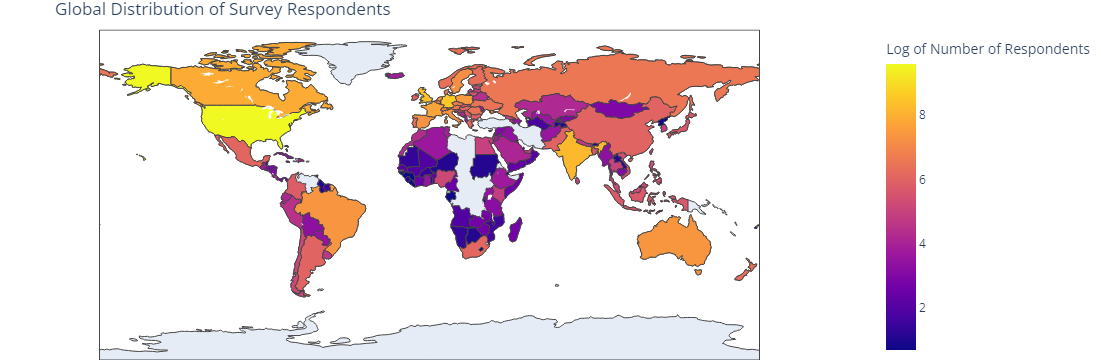

In [126]:
# Function to convert country names to ISO Alpha-3 codes
def get_alpha_3(country_name):
    try:
        return countries.lookup(country_name).alpha_3
    except:
        return None

# Apply the function to your country data
survey['iso_alpha'] = survey['Country'].apply(get_alpha_3)

# Count the number of respondents by country code
country_counts = survey['iso_alpha'].value_counts().reset_index()
country_counts.columns = ['iso_alpha', 'count']

# Apply logarithmic transformation to 'count' to improve the visualization scale
country_counts['log_count'] = np.log1p(country_counts['count']) 

# Create the choropleth map using the transformed 'log_count' for color scale
fig = px.choropleth(country_counts,
                    locations="iso_alpha",
                    color="log_count",  # Use log-transformed counts for coloring
                    hover_name="iso_alpha",
                    hover_data={"iso_alpha": False, "log_count": False, "count": True},  # Display actual count on hover
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'log_count':'Log of Number of Respondents'},  # Label adjustment to reflect log transformation
                    title="Global Distribution of Survey Respondents")
fig.update_layout(autosize=True, margin={"r":0,"t":30,"l":0,"b":0})
fig.show()
